In [2]:
import requests 

In [3]:
url = 'https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize=100'
r = requests.get(url)
r.content

b'<!doctype html>\n\n<!--[if lt IE 7]> <html class="no-js lt-ie9 lt-ie8 lt-ie7 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie9 lt-ie8 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie9 lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-GB"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html lang="en-GB">\n<!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n\n    <title>British Airways Customer Reviews - SKYTRAX</title>\n\n    <!-- Google Chrome Frame for IE -->\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\n    <!-- mobile meta -->\n    <meta name="HandheldFriendly" content="True">\n    <meta name="MobileOptimized" content="320">\n    <meta name="viewport"\n        content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" />\n    <!-- icons & favicons -->\n    <link rel="apple-touch-icon" href="https://www.airlinequal

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, 'html.parser')

In [5]:
articles = soup.find_all('article', itemprop="review")
articles

[<article class="comp comp_media-review-rated list-item media position-content review-858799" itemprop="review" itemscope="" itemtype="http://schema.org/Review">
 <meta content="2023-06-20" itemprop="datePublished"/>
 <div class="rating-10" itemprop="reviewRating" itemscope="" itemtype="http://schema.org/Rating">
 <span itemprop="ratingValue">7</span>/<span itemprop="bestRating">10</span>
 </div>
 <div class="body" id="anchor858799">
 <h2 class="text_header">"Economy class seating was truly dreadful"</h2>
 <h3 class="text_sub_header userStatusWrapper">
 <span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
 <a class="userStatus hiflyer" href="/reviewer/reviewer-signup"><span class="userStatusReviewCount">14 reviews</span><svg class="userStatusIcon" version="1.1" viewbox="0 0 307.3 193.5" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">
 <path d="M157.9,95c-13.1,5.5-26.3,11.1-38.5,16c-21,8.4-42.4,16-65.1,18.7c-16,1.5-26.5-1-31.6-9.7C15.6

In [6]:
import pandas as pd 
import datetime

In [7]:
df = []
for a in articles:
    ID = a.find('div', class_='body')
    ID = ID.get('id')
    
    text = a.find('div', class_='text_content').text
    
    label = a.find(class_='text_header').text
    
    user = a.find(None, itemprop="name").text
    
    date = a.find('time').text
    
    rating = a.find(None, itemprop='ratingValue').text  
    rating = int(rating)
                   
    df.append([ID,label,user,text,date,rating]) 
      
df = pd.DataFrame(df, columns=["ID","label",'user','text','date', 'rating'])   
df 


,ID,label,user,text,date,rating
0,anchor858799,"""Economy class seating was truly dreadful""",Richard Hodges,✅ Trip Verified | Travelled to Heathrow to Kal...,20th June 2023,7
1,anchor858702,"""flight failed at every level""",Carol Willmore,Not Verified | This flight failed at every le...,20th June 2023,1
2,anchor858648,"""BA refuses to make it right""",Nadine Kohler,Not Verified | Beware of British Airways and ...,19th June 2023,1
3,anchor858509,"""shame for such well known airline""",A. Adel,✅ Trip Verified | I flew from Cairo to Heathr...,19th June 2023,2
4,anchor858044,"""Total garbage""",Cosmin Stefanescu,"Not Verified | I flew with numerous airlines, ...",16th June 2023,1
...,...,...,...,...,...,...
95,anchor836931,"""squashed into regular seats""",Pam Schell,✅ Trip Verified | First our morning flight wa...,28th February 2023,1
96,anchor836673,"""nice and professional crew""",Janeks Volkovs,✅ Trip Verified | Although it was a bit uncom...,27th February 2023,8
97,anchor836687,"""acceptable experience, nothing more""",M Camere,✅ Trip Verified | Boarding was decently organ...,27th February 2023,6
98,anchor836683,"""FA's were very friendly""",M Camere,✅ Trip Verified | Boarding on time and departu...,27th February 2023,7


In [8]:
u = []
#deal with review table
for a in articles:
    b = a.find_all('tr')
    data_dict = {"Aircraft": None, 
                 "Type Of Traveller": None,
                 "Seat Type": None, 
                 "Route": None, 
                 "Date Flown": None,
                 "Seat Comfort": None ,
                 "Cabin Staff Service": None, 
                 "Food & Beverages": None,
                 "Inflight Entertainment": None,
                 "Ground Service": None, 
                 "Wifi & Connectivity": None,
                 "Value For Money": None,
                 "Recommended": None}
    for i in b:
        
        aircraft = i.find('td', class_='review-rating-header aircraft')
        if aircraft: 
            aircraft = aircraft.find_next_sibling('td', class_='review-value').text  
            data_dict["Aircraft"] = aircraft   
        if data_dict["Aircraft"] == None: 
            data_dict["Aircraft"] = "None"    
            
        type_of_traveller = i.find('td', class_='review-rating-header type_of_traveller') 
        if type_of_traveller:
            type_of_traveller = type_of_traveller.find_next_sibling('td', class_='review-value').text
            data_dict['Type Of Traveller'] = type_of_traveller
        if data_dict['Type Of Traveller'] == None: 
            data_dict["Type Of Traveller"] = "None"   
        
        seat_type = i.find('td', class_='review-rating-header cabin_flown')
        if seat_type:
            seat_type = seat_type.find_next_sibling('td', class_='review-value').text
            data_dict['Seat Type'] = seat_type
        if data_dict["Seat Type"] == None: 
            data_dict['Seat Type'] = "None"    
            
        route = i.find('td', class_='review-rating-header route')
        if route:
            route = route.find_next_sibling('td', class_='review-value').text
            data_dict['Route'] = route
        if data_dict["Route"] == None: 
            data_dict['Route'] = "None"    
              
            
        date_flown = i.find('td', class_='review-rating-header date_flown')
        if date_flown:
            date_flown = date_flown.find_next_sibling('td', class_='review-value').text
            data_dict['Date Flown'] = date_flown
        if data_dict["Date Flown"] == None: 
            data_dict['Date Flown'] = "None"          
        
        #star rating 
        
        seat_comfort_row = i.find('td', class_='review-rating-header seat_comfort')
        star_fill_ratings = []
        if seat_comfort_row:    
            next_td = seat_comfort_row.find_next('td')
            star_fill_ratings = next_td.find_all('span', class_='star fill')    
            data_dict['Seat Comfort'] = len(star_fill_ratings)
        
        css_row = i.find('td', class_='review-rating-header cabin_staff_service')
        star_fill_ratings = []
        if css_row:    
            next_td = css_row.find_next('td')
            star_fill_ratings = next_td.find_all('span', class_='star fill')    
            data_dict['Cabin Staff Service'] = len(star_fill_ratings)  
        
        fb_row = i.find('td', class_='review-rating-header food_and_beverages')
        star_fill_ratings = []
        if fb_row:    
            next_td = fb_row.find_next('td')
            star_fill_ratings = next_td.find_all('span', class_='star fill')    
            data_dict['Food & Beverages'] = len(star_fill_ratings)
            
        ie_row = i.find('td', class_='review-rating-header inflight_entertainment')
        star_fill_ratings = []
        if ie_row:    
            next_td = ie_row.find_next('td')
            star_fill_ratings = next_td.find_all('span', class_='star fill')    
            data_dict['Inflight Entertainment'] = len(star_fill_ratings) 
        
        gs_row = i.find('td', class_='review-rating-header ground_service')
        star_fill_ratings = []
        if gs_row:    
            next_td = gs_row.find_next('td')
            star_fill_ratings = next_td.find_all('span', class_='star fill')    
            data_dict['Ground Service'] = len(star_fill_ratings)   
            
        wc_row = i.find('td', class_='review-rating-header wifi_and_connectivity')
        star_fill_ratings = []
        if wc_row:    
            next_td = wc_row.find_next('td')
            star_fill_ratings = next_td.find_all('span', class_='star fill')    
            data_dict['Ground Service'] = len(star_fill_ratings)   
            
        vm_row = i.find('td', class_='review-rating-header value_for_money')
        star_fill_ratings = []
        if vm_row:    
            next_td = vm_row.find_next('td')
            star_fill_ratings = next_td.find_all('span', class_='star fill')    
            data_dict['Value For Money'] = len(star_fill_ratings)   
            
        recommended = i.find('td', class_='review-rating-header recommended')
        if recommended:
            recommended = recommended.find_next_sibling('td', class_='review-value').text 
            data_dict['Recommended'] = recommended                     
                                  
    u.append([data_dict["Aircraft"], data_dict['Type Of Traveller'], data_dict['Seat Type'], data_dict['Route'], data_dict['Date Flown'], data_dict['Seat Comfort'],data_dict['Cabin Staff Service'],data_dict['Food & Beverages'],data_dict['Inflight Entertainment'],data_dict['Ground Service'],data_dict['Ground Service'],data_dict['Value For Money'],data_dict['Recommended']])
u = pd.DataFrame(u, columns=["Aircraft", 
                 "Type Of Traveller",
                 "Seat Type", 
                 "Route", 
                 "Date Flown",
                 "Seat Comfort",
                 "Cabin Staff Service", 
                 "Food & Beverages",
                 "Inflight Entertainment",
                 "Ground Service", 
                 "Wifi & Connectivity",
                 "Value For Money",
                 "Recommended"])
u

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 737,Couple Leisure,Economy Class,London Heathrow to Kalamata,June 2023,1.0,4.0,3.0,NaN,3.0,3.0,3,yes
1,None,Couple Leisure,Economy Class,London to Funchal,June 2023,4.0,4.0,1.0,NaN,1.0,1.0,1,no
2,None,Family Leisure,Economy Class,Marseille to Seattle via London Heathrow,June 2023,2.0,3.0,3.0,4.0,2.0,2.0,1,no
3,None,Solo Leisure,Business Class,Cairo to London,June 2023,1.0,3.0,2.0,1.0,2.0,2.0,1,no
4,None,Solo Leisure,Economy Class,Bucharest to Dallas via London,June 2023,2.0,4.0,3.0,3.0,1.0,1.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,A321neo,Business,Business Class,London to Cairo,January 2023,1.0,2.0,1.0,1.0,3.0,3.0,1,no
96,Boeing 787,Solo Leisure,Economy Class,London Singapore,February 2023,3.0,5.0,5.0,4.0,5.0,5.0,4,yes
97,A380,Business,Business Class,London to Dubai,February 2023,2.0,3.0,2.0,3.0,4.0,4.0,3,yes
98,A320,Business,Business Class,Brussels to London,February 2023,2.0,4.0,4.0,NaN,4.0,4.0,4,yes


In [9]:
data = pd.concat([df, u], axis=1, join='inner')
data

,ID,label,user,text,date,rating,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,anchor858799,"""Economy class seating was truly dreadful""",Richard Hodges,✅ Trip Verified | Travelled to Heathrow to Kal...,20th June 2023,7,Boeing 737,Couple Leisure,Economy Class,London Heathrow to Kalamata,June 2023,1.0,4.0,3.0,NaN,3.0,3.0,3,yes
1,anchor858702,"""flight failed at every level""",Carol Willmore,Not Verified | This flight failed at every le...,20th June 2023,1,None,Couple Leisure,Economy Class,London to Funchal,June 2023,4.0,4.0,1.0,NaN,1.0,1.0,1,no
2,anchor858648,"""BA refuses to make it right""",Nadine Kohler,Not Verified | Beware of British Airways and ...,19th June 2023,1,None,Family Leisure,Economy Class,Marseille to Seattle via London Heathrow,June 2023,2.0,3.0,3.0,4.0,2.0,2.0,1,no
3,anchor858509,"""shame for such well known airline""",A. Adel,✅ Trip Verified | I flew from Cairo to Heathr...,19th June 2023,2,None,Solo Leisure,Business Class,Cairo to London,June 2023,1.0,3.0,2.0,1.0,2.0,2.0,1,no
4,anchor858044,"""Total garbage""",Cosmin Stefanescu,"Not Verified | I flew with numerous airlines, ...",16th June 2023,1,None,Solo Leisure,Economy Class,Bucharest to Dallas via London,June 2023,2.0,4.0,3.0,3.0,1.0,1.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,anchor836931,"""squashed into regular seats""",Pam Schell,✅ Trip Verified | First our morning flight wa...,28th February 2023,1,A321neo,Business,Business Class,London to Cairo,January 2023,1.0,2.0,1.0,1.0,3.0,3.0,1,no
96,anchor836673,"""nice and professional crew""",Janeks Volkovs,✅ Trip Verified | Although it was a bit uncom...,27th February 2023,8,Boeing 787,Solo Leisure,Economy Class,London Singapore,February 2023,3.0,5.0,5.0,4.0,5.0,5.0,4,yes
97,anchor836687,"""acceptable experience, nothing more""",M Camere,✅ Trip Verified | Boarding was decently organ...,27th February 2023,6,A380,Business,Business Class,London to Dubai,February 2023,2.0,3.0,2.0,3.0,4.0,4.0,3,yes
98,anchor836683,"""FA's were very friendly""",M Camere,✅ Trip Verified | Boarding on time and departu...,27th February 2023,7,A320,Business,Business Class,Brussels to London,February 2023,2.0,4.0,4.0,NaN,4.0,4.0,4,yes


In [10]:
data.isnull().sum()

ID                         0
label                      0
user                       0
text                       0
date                       0
rating                     0
Aircraft                   0
Type Of Traveller          0
Seat Type                  0
Route                      0
Date Flown                 0
Seat Comfort               5
Cabin Staff Service        7
Food & Beverages          16
Inflight Entertainment    38
Ground Service             2
Wifi & Connectivity        2
Value For Money            0
Recommended                0
dtype: int64

In [11]:
data.describe()

,rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,100.000000,95.000000,93.000000,84.00000,62.000000,98.000000,98.000000,100.000000
mean,3.010000,2.452632,2.784946,2.27381,2.564516,2.081633,2.081633,1.890000
std,2.855068,1.374296,1.458479,1.32038,1.466802,1.483055,1.483055,1.309599
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,3.000000,2.00000,3.000000,1.000000,1.000000,1.000000
75%,4.000000,4.000000,4.000000,3.00000,4.000000,3.000000,3.000000,2.000000
max,10.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000


In [12]:
rating_data = data[["Seat Comfort",
                 "Cabin Staff Service", 
                 "Food & Beverages",
                 "Inflight Entertainment",
                 "Ground Service", 
                 "Wifi & Connectivity",
                 "Value For Money", 
                 "rating", "Recommended"
                 ]]

rating_data 

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
0,1.0,4.0,3.0,NaN,3.0,3.0,3,7,yes
1,4.0,4.0,1.0,NaN,1.0,1.0,1,1,no
2,2.0,3.0,3.0,4.0,2.0,2.0,1,1,no
3,1.0,3.0,2.0,1.0,2.0,2.0,1,2,no
4,2.0,4.0,3.0,3.0,1.0,1.0,1,1,no
...,...,...,...,...,...,...,...,...,...
95,1.0,2.0,1.0,1.0,3.0,3.0,1,1,no
96,3.0,5.0,5.0,4.0,5.0,5.0,4,8,yes
97,2.0,3.0,2.0,3.0,4.0,4.0,3,6,yes
98,2.0,4.0,4.0,NaN,4.0,4.0,4,7,yes


In [13]:
from sklearn import preprocessing
import numpy as py

In [14]:

rating_data

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
0,1.0,4.0,3.0,NaN,3.0,3.0,3,7,yes
1,4.0,4.0,1.0,NaN,1.0,1.0,1,1,no
2,2.0,3.0,3.0,4.0,2.0,2.0,1,1,no
3,1.0,3.0,2.0,1.0,2.0,2.0,1,2,no
4,2.0,4.0,3.0,3.0,1.0,1.0,1,1,no
...,...,...,...,...,...,...,...,...,...
95,1.0,2.0,1.0,1.0,3.0,3.0,1,1,no
96,3.0,5.0,5.0,4.0,5.0,5.0,4,8,yes
97,2.0,3.0,2.0,3.0,4.0,4.0,3,6,yes
98,2.0,4.0,4.0,NaN,4.0,4.0,4,7,yes


In [15]:
rating_data['Recommended'] = rating_data['Recommended'].map({'yes': 1, 'no': 0})
rating_data['Recommended']


C:\Users\hoduo\AppData\Local\Temp\ipykernel_9284\906117648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_data['Recommended'] = rating_data['Recommended'].map({'yes': 1, 'no': 0})


0     1
1     0
2     0
3     0
4     0
     ..
95    0
96    1
97    1
98    1
99    0
Name: Recommended, Length: 100, dtype: int64

In [16]:
rating_data = rating_data.fillna(rating_data.median())
rating_data

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
0,1.0,4.0,3.0,3.0,3.0,3.0,3,7,1
1,4.0,4.0,1.0,3.0,1.0,1.0,1,1,0
2,2.0,3.0,3.0,4.0,2.0,2.0,1,1,0
3,1.0,3.0,2.0,1.0,2.0,2.0,1,2,0
4,2.0,4.0,3.0,3.0,1.0,1.0,1,1,0
...,...,...,...,...,...,...,...,...,...
95,1.0,2.0,1.0,1.0,3.0,3.0,1,1,0
96,3.0,5.0,5.0,4.0,5.0,5.0,4,8,1
97,2.0,3.0,2.0,3.0,4.0,4.0,3,6,1
98,2.0,4.0,4.0,3.0,4.0,4.0,4,7,1


In [17]:
rating_data.corr()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
Seat Comfort,1.000000,0.575245,0.515320,0.485783,0.516925,0.516925,0.521151,0.581140,0.454646
Cabin Staff Service,0.575245,1.000000,0.577533,0.396094,0.521437,0.521437,0.569001,0.593906,0.506171
Food & Beverages,0.515320,0.577533,1.000000,0.492174,0.426606,0.426606,0.486554,0.465925,0.456765
Inflight Entertainment,0.485783,0.396094,0.492174,1.000000,0.342669,0.342669,0.290059,0.342275,0.331065
Ground Service,0.516925,0.521437,0.426606,0.342669,1.000000,1.000000,0.724654,0.752572,0.674557
Wifi & Connectivity,0.516925,0.521437,0.426606,0.342669,1.000000,1.000000,0.724654,0.752572,0.674557
Value For Money,0.521151,0.569001,0.486554,0.290059,0.724654,0.724654,1.000000,0.886399,0.823386
rating,0.581140,0.593906,0.465925,0.342275,0.752572,0.752572,0.886399,1.000000,0.877667
Recommended,0.454646,0.506171,0.456765,0.331065,0.674557,0.674557,0.823386,0.877667,1.000000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

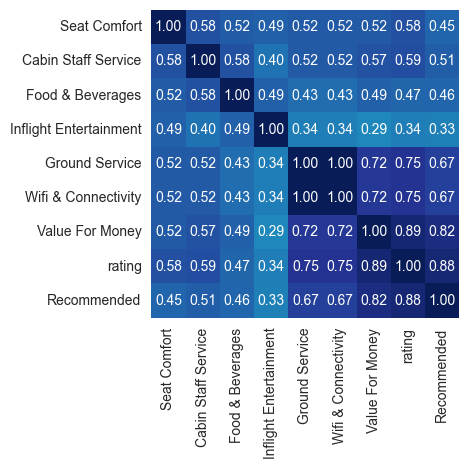

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,rating,Recommended
Seat Comfort,1.000000,0.575245,0.515320,0.485783,0.516925,0.516925,0.521151,0.581140,0.454646
Cabin Staff Service,0.575245,1.000000,0.577533,0.396094,0.521437,0.521437,0.569001,0.593906,0.506171
Food & Beverages,0.515320,0.577533,1.000000,0.492174,0.426606,0.426606,0.486554,0.465925,0.456765
Inflight Entertainment,0.485783,0.396094,0.492174,1.000000,0.342669,0.342669,0.290059,0.342275,0.331065
Ground Service,0.516925,0.521437,0.426606,0.342669,1.000000,1.000000,0.724654,0.752572,0.674557
Wifi & Connectivity,0.516925,0.521437,0.426606,0.342669,1.000000,1.000000,0.724654,0.752572,0.674557
Value For Money,0.521151,0.569001,0.486554,0.290059,0.724654,0.724654,1.000000,0.886399,0.823386
rating,0.581140,0.593906,0.465925,0.342275,0.752572,0.752572,0.886399,1.000000,0.877667
Recommended,0.454646,0.506171,0.456765,0.331065,0.674557,0.674557,0.823386,0.877667,1.000000


In [19]:
#Plot the correlation 
plt.figure(figsize=(4, 4))
sns.heatmap(rating_data[rating_data.select_dtypes('number').columns].corr(),
            square=True, cmap="YlGnBu", cbar=False, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()
rating_data.corr()

### The Food & Beverages and Inflight Entertainment have the lowest impact on the rating and recommended

In [20]:
#check recommended rating 
rating_data[rating_data['Recommended'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
Seat Comfort,19.0,3.684211,1.335525,1.0,3.0,4.0,5.0,5.0
Cabin Staff Service,19.0,4.263158,1.045738,1.0,4.0,5.0,5.0,5.0
Food & Beverages,19.0,3.368421,1.211543,2.0,2.0,3.0,4.5,5.0
Inflight Entertainment,19.0,3.526316,0.841191,3.0,3.0,3.0,4.0,5.0
Ground Service,19.0,4.105263,1.149625,1.0,4.0,4.0,5.0,5.0
Wifi & Connectivity,19.0,4.105263,1.149625,1.0,4.0,4.0,5.0,5.0
Value For Money,19.0,4.105263,1.048530,1.0,4.0,4.0,5.0,5.0
rating,19.0,8.157895,2.167004,1.0,7.0,9.0,10.0,10.0
Recommended,19.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [21]:
rating_data[rating_data['Recommended'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Seat Comfort,81.0,2.135802,1.169969,1.0,1.0,2.0,3.0,5.0
Cabin Staff Service,81.0,2.456790,1.255482,1.0,1.0,3.0,3.0,5.0
Food & Beverages,81.0,1.962963,1.054093,1.0,1.0,2.0,3.0,5.0
Inflight Entertainment,81.0,2.543210,1.162426,1.0,1.0,3.0,3.0,5.0
Ground Service,81.0,1.580247,1.082407,1.0,1.0,1.0,2.0,5.0
Wifi & Connectivity,81.0,1.580247,1.082407,1.0,1.0,1.0,2.0,5.0
Value For Money,81.0,1.370370,0.660387,1.0,1.0,1.0,2.0,4.0
rating,81.0,1.802469,1.122717,1.0,1.0,1.0,2.0,5.0
Recommended,81.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### From the correlation of attributes. The low of the Ground Service'quality, Wifi & Connectivity, and Value For Money make the customer rating also low. That makes a bad influence to the rate of Recommended  	  	

In [22]:
#sns.pairplot(rating_data, hue='Recommended', palette = "RdBu")

In [23]:
#data.to_csv("100_reviews.csv")